## Detector de caras en foto o video utilizando red preentrenada

https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

In [1]:
# import the necessary packages
from imutils.video import VideoStream, FileVideoStream
import imutils
import time

import numpy as np
import argparse
import cv2

%matplotlib notebook
import matplotlib.pyplot as plt

from cv_course import lib

#### Model preentrenado

In [2]:
prototxt = '../objects/face_detection.prototxt'
model = '../objects/face_detection.caffemodel'

# load pretrained model 
net = cv2.dnn.readNetFromCaffe(prototxt, model)

In [3]:
def detect_faces(image, confidence_threshold=0.7):
    (h, w) = image.shape[:2]
    # detail blobFromImage https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    # print(f'Image shape: {image.shape}')
    # print(f'Blob shape: {blob.shape}')

    # detect faces in image
    net.setInput(blob)
    detections = net.forward()


    # print(f'Detections shape: {detections.shape}')
    # print(f'Detection example: {detections[0, 0, 0, :]}')

    # loop over detections
    # detection 3rd dimension is number of detection
    # detection 4th dimension is 7 numbers: _, _, confidence, xmin, ymin, xmax, ymax

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # filter out weak detections
        if confidence > confidence_threshold:
            # compute the (x, y)-coordinates of the bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face with the associated probability
            text = f'{confidence*100:.2f}'
            # careful with borders
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
            cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    return image

### Imagen

In [4]:
# load image from file
image_path = '../images/manu.jpeg'
image = cv2.imread(image_path)

In [6]:
# or load image from webcam
vs = VideoStream(src=0).start()

In [9]:
image = vs.read()

<IPython.core.display.Javascript object>


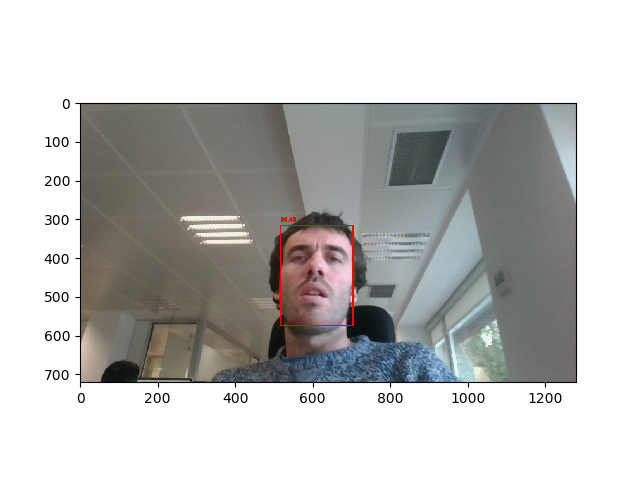

In [5]:
detected_image = detect_faces(image)
lib.plot(detected_image)

### Video

In [4]:
# inicia webcam
if 'vs' not in dir() or vs.stopped:
    print('Iniciando video...')
    vs = VideoStream(src=0).start()

Iniciando video...


In [5]:
'''
# de un archivo de video
print("[INFO] starting video stream...")
vs = FileVideoStream(src=0).start()
time.sleep(2.0)
'''

'\n# de un archivo de video\nprint("[INFO] starting video stream...")\nvs = FileVideoStream(src=0).start()\ntime.sleep(2.0)\n'

In [6]:
sleep_between_frames = 0.1

In [ ]:
# loop over the frames from the video stream
print('Press space in video to exit')

while True:
    # grab the frame from the threaded video stream and resize it
    time.sleep(sleep_between_frames)
    frame = vs.read()
    
    frame = imutils.resize(frame, width=400)
    detected_frame = detect_faces(frame)
    
    cv2.imshow("Video_caras", cv2.resize(detected_frame, None, fx=2, fy=2))
    key_pressed = chr(cv2.waitKey(10) & 255)
    if key_pressed == ' ':
        print('STOPPED video')
        break
        
cv2.destroyAllWindows()

Press space in video to exit
